# Getting Started with Data Science in Julia

## What does your data look like?

Before you can solve complex problems with data, you should have a firm grasp on what your data looks like.  Are your variables continuous or categorical?  What do the distributions look like?  Are there missing observations?  Are variables correlated?  All of these questions arise in the data science workflow, so it's helpful to know the answers from the start of your analysis.

Let's start with loading the [**`Statistics`**](https://docs.julialang.org/en/latest/stdlib/Statistics/) package, which provides basic statistical operations like means, variances, etc.


In [1]:
using Statistics

You can examine the items that a package exports with the `names` function.

In [2]:
names(Statistics)

14-element Array{Symbol,1}:
 :Statistics
 :cor
 :cov
 :mean
 :mean!
 :median
 :median!
 :middle
 :quantile
 :quantile!
 :std
 :stdm
 :var
 :varm

To start, let us try some of the functions from **`Statistics`** on simulated data.

In [3]:
x = randn(100, 3)
mean(x, dims=1)  # calculate over first dimension (column means)
cor(x)  # correlation matrix  

3×3 Array{Float64,2}:
  1.0       -0.084378   -0.162899
 -0.084378   1.0        -0.0856229
 -0.162899  -0.0856229   1.0

For a more realistic example, let us load some data from the **`RDatasets`** package, which has a large collection of datasets that get loaded as a `DataFrame`.  

The [`"iris"` dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a collection of measurements for three different species of the iris flower: Iris Setosa, Iris Virginica, and Iris Versicolor (shown below).  The measurements consist of length and width of the petal and sepal (part underneath the flower).

In [4]:
using RDatasets
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


DataFrames are discussed in another course module.  For now, we'll just use the fact that data vectors from the DataFrame can be selected with `mydf.mycol`:

In [5]:
iris.SepalLength

150-element Array{Float64,1}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

What is the average sepal width across all three species?

In [6]:
mean(iris.SepalWidth)

3.0573333333333337

Maximum and minimum?

In [7]:
@show minimum(iris.SepalWidth)
@show maximum(iris.SepalWidth)
extrema(iris.SepalWidth)

minimum(iris.SepalWidth) = 2.0
maximum(iris.SepalWidth) = 4.4


(2.0, 4.4)

Is petal width correlated with petal length?

In [8]:
cor(iris.PetalWidth, iris.PetalLength)

0.9628654314027961

While we could examine each column separately, a much quicker way to summarize our variables is with the `describe` function:

In [9]:
describe(iris)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,,,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,,,Float64
3,PetalLength,3.758,1.0,4.35,6.9,,,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,,,Float64
5,Species,,setosa,,virginica,3,,CategoricalString{UInt8}


## Random Sampling

[Random Sampling](https://en.wikipedia.org/wiki/Sampling_(statistics)) plays an integral part in many data science tasks, such as:
- Splitting data into multiple datasets for [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).
- Subsampling a large dataset to something more manageable.
- Running statistical simulations. [Statistical Bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

The **`StatsBase`** package has the `sample` function to factilitate sampling [with or without replacement](https://en.wikipedia.org/wiki/Sampling_(statistics)#Replacement_of_selected_units).

Imagine you had a bag with 20 numbers in it.

Sampling with replacement means that you put the number you drew back into the bag before the next draw. Just like rolling a dice, each draw is _independent_ and a given number might get drawn again.

On the other hand, if you were to _not_ put the drawn number back in the bag, that would be representative of sampling without replacement.Each draw is _dependent_ upon all previous draws as those numbers are no longer available for selection.

For bootstrapping and statistical simulations, it's typical to use sampling with replacement. While the two behave nearly the same if the sample is a very small fraction of the overall population, it becomes important to sample without replacement if the sample is large or if using uneven importance weights.

In [11]:
import Pkg; Pkg.add("StatsBase")
using StatsBase
y1 = sample(1:20, 20, replace=true)  # replaces units after being selected

y2 = sample(1:20, 20, replace=false)  # DOES NOT replace units after being selected

   Updating registry at `/srv/julia/pkg/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [Fetching: [========================================>]  99.9 %

  Resolving package versions...
   Updating `~/Project.toml`
  [2913bbd2] + StatsBase v0.32.2
   Updating `~/Manifest.toml`
 [no changes]


20-element Array{Int64,1}:
 16
 11
  5
 10
 19
 12
 13
  8
 14
 17
  9
 15
 18
 20
  3
  4
  7
  2
  1
  6

Next we'll use the [`countmap`](http://juliastats.github.io/StatsBase.jl/latest/search.html?q=countmap) function to get the count of each unique value in our samples.  Notice that when we do sampling *without* replacement, the values will only appear one time.  When sampling *with* replacement, any given selected item is then placed back into the pool of possible items to select from.

In [15]:
@show countmap(y1)
@show countmap(y2)

countmap(y1) = Dict(2 => 2,16 => 3,7 => 1,9 => 2,19 => 1,17 => 1,4 => 1,3 => 2,5 => 1,20 => 1,12 => 3,18 => 2)
countmap(y2) = Dict(18 => 1,2 => 1,16 => 1,11 => 1,7 => 1,9 => 1,10 => 1,19 => 1,17 => 1,8 => 1,6 => 1,4 => 1,3 => 1,5 => 1,20 => 1,13 => 1,14 => 1,15 => 1,12 => 1,1 => 1)


Dict{Int64,Int64} with 20 entries:
  18 => 1
  2  => 1
  16 => 1
  11 => 1
  7  => 1
  9  => 1
  10 => 1
  19 => 1
  17 => 1
  8  => 1
  6  => 1
  4  => 1
  3  => 1
  5  => 1
  20 => 1
  13 => 1
  14 => 1
  15 => 1
  12 => 1
  1  => 1

This is just a small sample (pun intended) of the features in **`StatsBase`**.  For a more complete look of what is possible, check out the [documentation](http://juliastats.github.io/StatsBase.jl/latest/index.html).

## Parametric Distributions

The [**`Distributions`**](https://github.com/JuliaStats/Distributions.jl) package provides an interface for working with probability distributions.  The full documentation is [here](https://juliastats.github.io/Distributions.jl/stable/).  

Here we'll also load the **`StatsPlots`** package (more on this in the next course module) to visualize the probability distributions.

  Resolving package versions...
   Updating `~/Project.toml`
 [no changes]
   Updating `~/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed Ogg_jll ─────────── v1.3.4+0
  Installed FriBidi_jll ─────── v1.0.5+3
  Installed Observables ─────── v0.3.1
  Installed x264_jll ────────── v2019.5.25+2
  Installed libass_jll ──────── v0.14.0+2
  Installed DataValues ──────── v0.4.13
  Installed StatsPlots ──────── v0.14.5
  Installed FFMPEG_jll ──────── v4.1.0+3
  Installed LibVPX_jll ──────── v1.8.1+1
  Installed Bzip2_jll ───────── v1.0.6+2
  Installed OpenSSL_jll ─────── v1.1.1+2
  Installed PlotThemes ──────── v2.0.0
  Installed Plots ───────────── v1.2.2
  Installed TableOperations ─── v0.2.1
  Installed libvorbis_jll ───── v1.3.6+4
  Installed RecipesPipeline ─── v0.1.7
  Installed ColorSchemes ────── v3.9.0
  Installed Opus_jll ────────── v1.3.1+1
  Installed MultivariateStats ─ v0.7.0
  Installed PlotUtils ───────── v1.0.2
  Installed RecipesBase ─────── v1.0.1
  I

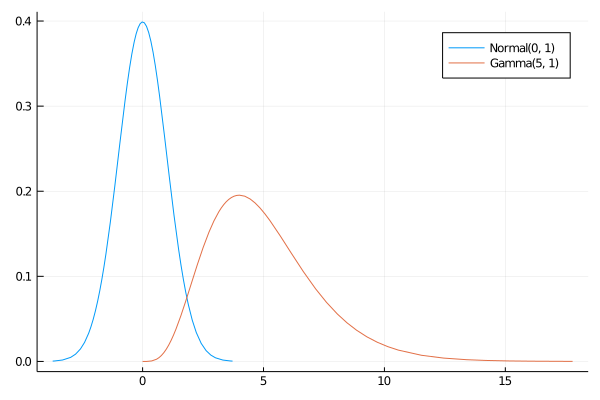

In [18]:
import Pkg
Pkg.add("Distributions")
Pkg.add("StatsPlots")

using Distributions, StatsPlots
plot(Normal(), label = "Normal(0, 1)")

#-

plot!(Gamma(5, 1), label = "Gamma(5, 1)")

The package defines a number of functions that together create a consistent "grammar" for discussing distributions:

- Probability density function: `pdf`
- Cumulative distribution function: `cdf`
- The inverse cumulative distribution function with the standard `quantile` statistical function
- etc.

In [21]:
d = Normal()

pdf(d, 0), cdf(d, 0), mean(d), var(d), quantile(d, .5), mode(d)

#-

d = Gamma(5, 1)

pdf(d, 0), cdf(d, 0), mean(d), var(d), quantile(d, .5), mode(d)

(0.0, 0.0, 5.0, 5.0, 4.670908882795984, 4.0)

As an example, let's write a function that uses [Newton's Method](https://en.wikipedia.org/wiki/Newton%27s_method) that can find a given quantile for any continuous univariate distribution.  Newton's method attempts to find the root for a function $f$ by performing iterations of the form:

$$\theta^{(t)} = \theta^{(t-1)} - \frac{f(\theta^{(t-1)})}{f'(\theta^{(t-1)})}.$$

For quantiles, we want to find the root of the function $F(\theta) - q$ where $F$ is the cumulative density function of the distribtuion and $q \in (0, 1)$.  Using **`Distributions`**, this looks something like

In [22]:
function myquantile(d::Distribution, q::Number)
    θ = mean(d)
    for i in 1:20
        θ -= (cdf(d, θ) - q) / pdf(d, θ)  # θ = θ - (F(θ) - q) / F'(θ)
    end
    θ
end

myquantile (generic function with 1 method)

In [ ]:
Does our `myquantile` function work as expected?  Let's try out our function on several distributions.

In [23]:
d = Normal()
myquantile(d, .5), quantile(d, .5)

(0.0, 0.0)

In [24]:
d = Gamma(4,3)
myquantile(d, .7), quantile(d, .7)

(14.28668728960775, 14.28668728960775)

The above example shows off the power of generic functions.  Instead of hard-coding the distribution (as would be necessary in R), we can write functions in terms of an arbitrary distribution (without extra effort).  This gives us a lot of flexibility for tasks such as writing [Gibbs Samplers](https://en.wikipedia.org/wiki/Gibbs_sampling) that can swap out distributions with ease.